In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [10]:
# Initialisierung von DataFrames und Data Cleaning
df = pd.read_csv('Laptop-Preise.csv', sep=';', decimal=',')
df = df[df.extern_Schnittstellen != 2300] # Ausreißer löschen
df = df.reset_index(drop=True) # Reset Index
df_noPrice = df.drop('Preis', axis=1)

# Skalierung (Standardisierung) von df_noPrice
col_names = df_noPrice.columns

scaler = StandardScaler().fit(df_noPrice.values)
df_noPrice = scaler.transform(df_noPrice.values)
df_noPrice = pd.DataFrame(df_noPrice, columns=col_names)

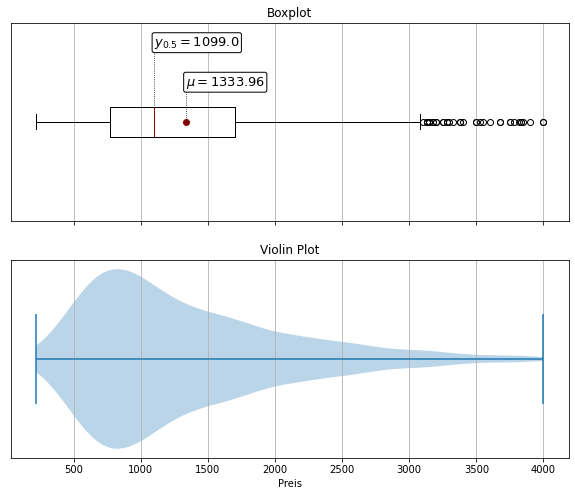

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)  # Subplots mit gemeinsamer X-Achse erstellen

# Erster Boxplot
ax1.boxplot(df['Preis'], vert=False, medianprops=dict(color='darkred'))
ax1.set_title('Boxplot')

# Zweiter Boxplot
ax2.violinplot(df['Preis'], vert=False)
ax2.set_title('Violin Plot')

ax1.grid(True, axis='x')
ax2.grid(True, axis='x')

# Y-Achsenbeschriftung entfernen
ax1.set_yticklabels([])
ax2.set_yticklabels([])

# Y-Achsen-Tick-Markierungen entfernen
ax1.set_yticks([])
ax2.set_yticks([])

mean=df['Preis'].mean()
median=df['Preis'].median()
ax1.scatter(mean, 1, color='darkred', zorder=3)
    
# Add line conecting mean value and its label
ax1.plot([mean, mean], [1, 1 + 0.2], ls="dotted", color="black", zorder=3, linewidth=0.8)
ax1.plot([median, median], [1.085, 1 + 0.4], ls="dotted", color="black", zorder=3, linewidth=0.8)

# Add mean value label.
ax1.text(
    mean,
    1 + 0.20,
    r"$\mu = $" + str(round(mean, 2)),
    fontsize=13,
    va="center",
    bbox = dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10 # to make sure the line is on top
)

ax1.text(
    median,
    1 + 0.40,
    r"$y_{0.5} = $" + str(round(median, 2)),
    fontsize=13,
    va="center",
    bbox = dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round",
        pad=0.15
    ),
    zorder=10 # to make sure the line is on top
)

# X-Achsenbeschriftung setzen
plt.xlabel('Preis')

plt.savefig('preis.pdf')
plt.show()  # Diagramm anzeigen

In [75]:
from scipy.stats import skew

print(np.round(df['Preis'].describe(),2).to_latex())
skew(df['Preis'])

\begin{tabular}{lr}
\toprule
{} &    Preis \\
\midrule
count &  1038.00 \\
mean  &  1333.96 \\
std   &   748.48 \\
min   &   219.90 \\
25\%   &   769.00 \\
50\%   &  1099.00 \\
75\%   &  1699.00 \\
max   &  3999.00 \\
\bottomrule
\end{tabular}



C:\Users\Admin\AppData\Local\Temp\ipykernel_18044\1328426878.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(np.round(df['Preis'].describe(),2).to_latex())


1.1500160502824563

In [3]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = df_noPrice.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_noPrice.values, i) 
                          for i in range(len(df_noPrice.columns))]
print(vif_data.to_latex(escape=False, float_format="%.2f"))

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


\begin{tabular}{llr}
\toprule
{} &                         feature &  VIF \\
\midrule
0  &                           Kerne & 3.13 \\
1  &                  Takt_Prozessor & 2.21 \\
2  &                 Arbeitsspeicher & 2.42 \\
3  &                    Bild_Display & 2.78 \\
4  &                 Speicher_Grafik & 6.71 \\
5  &           extern_Schnittstellen & 2.28 \\
6  &                             HDD & 1.57 \\
7  &                             SSD & 2.00 \\
8  &                 Akku_Kapazitaet & 3.41 \\
9  &                     PPI_Display & 2.14 \\
10 &                     Pixelshader & 5.91 \\
11 &       Typ_Arbeitsspeicher_DDR_4 & 1.81 \\
12 &              Laufwerk_VORHANDEN & 1.83 \\
13 &     Lautsprecher_UEBERDURCHSCHN & 1.37 \\
14 &  Tastatur_Beleuchtung_vorhanden & 1.76 \\
15 &   Fingerabdrucksensor_vorhanden & 1.74 \\
16 &           Touchscreen_vorhanden & 1.47 \\
17 &             Mobilfunk_vorhanden & 1.47 \\
18 &                   NFC_vorhanden & 1.52 \\
19 &                 

C:\Users\Admin\AppData\Local\Temp\ipykernel_18044\3457183256.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(vif_data.to_latex(escape=False, float_format="%.2f"))


In [4]:
# Variablen löschen, die einen unendlich hohen VIF haben
df_noPrice.drop(['Betriebssystem_OHNE', 'Betriebssystem_Mac', 'Marke_Dell'], axis=1, inplace=True) # Mac und Marke_Apple sind identische Merkmale
vif_data = pd.DataFrame() 
vif_data["feature"] = df_noPrice.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_noPrice.values, i) 
                          for i in range(len(df_noPrice.columns))]
print(vif_data)

                           feature       VIF
0                            Kerne  3.126279
1                   Takt_Prozessor  2.211199
2                  Arbeitsspeicher  2.416486
3                     Bild_Display  2.776998
4                  Speicher_Grafik  6.709259
5            extern_Schnittstellen  2.275336
6                              HDD  1.571629
7                              SSD  1.995732
8                  Akku_Kapazitaet  3.414778
9                      PPI_Display  2.136790
10                     Pixelshader  5.914094
11       Typ_Arbeitsspeicher_DDR_4  1.810548
12              Laufwerk_VORHANDEN  1.831122
13     Lautsprecher_UEBERDURCHSCHN  1.372499
14  Tastatur_Beleuchtung_vorhanden  1.757679
15   Fingerabdrucksensor_vorhanden  1.743949
16           Touchscreen_vorhanden  1.474072
17             Mobilfunk_vorhanden  1.469378
18                   NFC_vorhanden  1.517686
19                    Akku_Typ_ION  1.681354
20                        Marke_HP  3.010897
21        

In [5]:
df_noPrice.drop(['Speicher_Grafik', 'Pixelshader'], axis=1, inplace=True) # Mac und Marke_Apple sind identische Merkmale
vif_data = pd.DataFrame() 
vif_data["feature"] = df_noPrice.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_noPrice.values, i) 
                          for i in range(len(df_noPrice.columns))]
print(vif_data.to_latex(escape=False, float_format="%.2f"))

\begin{tabular}{llr}
\toprule
{} &                         feature &  VIF \\
\midrule
0  &                           Kerne & 2.67 \\
1  &                  Takt_Prozessor & 1.82 \\
2  &                 Arbeitsspeicher & 2.41 \\
3  &                    Bild_Display & 2.59 \\
4  &           extern_Schnittstellen & 2.22 \\
5  &                             HDD & 1.48 \\
6  &                             SSD & 1.95 \\
7  &                 Akku_Kapazitaet & 3.25 \\
8  &                     PPI_Display & 2.12 \\
9  &       Typ_Arbeitsspeicher_DDR_4 & 1.79 \\
10 &              Laufwerk_VORHANDEN & 1.81 \\
11 &     Lautsprecher_UEBERDURCHSCHN & 1.37 \\
12 &  Tastatur_Beleuchtung_vorhanden & 1.69 \\
13 &   Fingerabdrucksensor_vorhanden & 1.72 \\
14 &           Touchscreen_vorhanden & 1.47 \\
15 &             Mobilfunk_vorhanden & 1.46 \\
16 &                   NFC_vorhanden & 1.51 \\
17 &                    Akku_Typ_ION & 1.66 \\
18 &                        Marke_HP & 3.01 \\
19 &                 

C:\Users\Admin\AppData\Local\Temp\ipykernel_18044\3503321875.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(vif_data.to_latex(escape=False, float_format="%.2f"))


In [7]:
len(df_noPrice.columns)

27

In [192]:
# OLS Model 
# fitting the model 
model = sm.OLS(df['Preis'], sm.add_constant(df_noPrice)).fit()
print('#'*23, '\n', 'SE von Preis = ', np.round(stats.sem(df['Preis']), 4), '\n', '#'*23, '\n', sep="")


std_y = df['Preis'].std()
std_x = df_noPrice.std()

# model.params[1:] sind alle Koeffizienten ohne Intercept
# Multipliziert mit ihrer Standardabweichung und geteilt durch die Standardabweichung von y (Preis)
standardized_coefs = abs(model.params[1:] * df_noPrice.std() / std_y)
print(standardized_coefs.abs())


#######################
SE von Preis = 23.2318
#######################

Kerne                             0.183023
Takt_Prozessor                    0.095150
Arbeitsspeicher                   0.264349
Bild_Display                      0.011136
extern_Schnittstellen             0.057341
HDD                               0.018837
SSD                               0.127256
Akku_Kapazitaet                   0.263603
PPI_Display                       0.105970
Typ_Arbeitsspeicher_DDR_4         0.084911
Laufwerk_VORHANDEN                0.032354
Lautsprecher_UEBERDURCHSCHN       0.032860
Tastatur_Beleuchtung_vorhanden    0.080195
Fingerabdrucksensor_vorhanden     0.020397
Touchscreen_vorhanden             0.047254
Mobilfunk_vorhanden               0.121274
NFC_vorhanden                     0.038070
Akku_Typ_ION                      0.044036
Marke_HP                          0.012819
Marke_ASUS                        0.011147
Marke_Acer                        0.004155
Marke_Apple              

In [193]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:06:28   Log-Likelihood:                -7295.8
No. Observations:                1038   AIC:                         1.465e+04
Df Residuals:                    1010   BIC:                         1.479e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [194]:

sorted_coefs = standardized_coefs.sort_values(ascending=False)

# Print the sorted values
# print(sorted_coefs)

# Get the top 5 largest values
top_5_coefs = sorted_coefs.head(12)
print(top_5_coefs)

Arbeitsspeicher                   0.264349
Akku_Kapazitaet                   0.263603
Marke_Apple                       0.254216
Kerne                             0.183023
Betriebssystem_Windows            0.127707
SSD                               0.127256
Mobilfunk_vorhanden               0.121274
PPI_Display                       0.105970
Takt_Prozessor                    0.095150
Marke_Lenovo                      0.088285
Typ_Arbeitsspeicher_DDR_4         0.084911
Tastatur_Beleuchtung_vorhanden    0.080195
dtype: float64


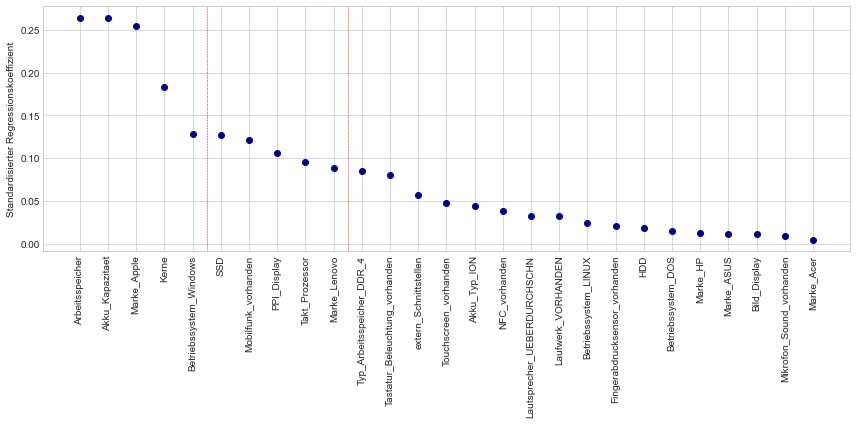

In [195]:
# plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
# Sort the standardized_coefs in descending order
sorted_coefs = standardized_coefs.sort_values(ascending=False)

# Plot the absolute values of coefficients as points with labels
plt.figure(figsize=(12, 6))
plt.scatter(sorted_coefs.index, sorted_coefs.values, marker='o', color='darkblue')
plt.ylabel('Standardisierter Regressionskoeffizient')
plt.xticks(rotation=90)

# Add labels to each point
# for i, (variable, coef) in enumerate(zip(sorted_coefs.index, sorted_coefs.values)):
#     plt.text(i, coef, f'{variable}\n{coef:.3f}', ha='center', va='bottom', rotation=45, fontsize=8)

plt.axvline(x=4.5, color='red', linestyle='--', linewidth = 0.5)
plt.axvline(x=9.5, color='red', linestyle='--', linewidth = 0.5)

plt.grid(True)
plt.tight_layout()
plt.savefig('std_regressionskoeffizienten.pdf') 
plt.show()


Wir können anhan der standardisierten Regressionskoeffizienten erkennen, dass die Variablen 
Akku_Kapazitaet        0.263387
Arbeitsspeicher        0.259367
Kerne                  0.141045
Mobilfunk_vorhanden    0.126480
SSD                    0.114271
einen besonders hohen Erklärungsgehalt bieten. Sie besitzen betragsmäßig den höchsten standardisierten Regressionskoeffizienten. Wir nehmen für künftige Untersuchungen diese fünf Variablen. 

In [196]:
np.round(df[top_5_coefs.index].describe(), 2)

,Arbeitsspeicher,Akku_Kapazitaet,Marke_Apple,Kerne,Betriebssystem_Windows,SSD,Mobilfunk_vorhanden,PPI_Display,Takt_Prozessor,Marke_Lenovo,Typ_Arbeitsspeicher_DDR_4,Tastatur_Beleuchtung_vorhanden
count,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00
mean,11.86,55.02,0.07,4.24,0.85,394.00,0.08,160.79,2011.27,0.23,0.88,0.73
std,6.05,16.20,0.25,1.31,0.36,256.86,0.27,43.17,405.89,0.42,0.33,0.44
min,4.00,24.00,0.00,2.00,0.00,0.00,0.00,96.00,1100.00,0.00,0.00,0.00
25%,8.00,45.00,0.00,4.00,1.00,256.00,0.00,141.00,1600.00,0.00,1.00,0.00
50%,8.00,51.00,0.00,4.00,1.00,256.00,0.00,141.00,1800.00,0.00,1.00,1.00
75%,16.00,60.00,0.00,4.00,1.00,512.00,0.00,165.00,2300.00,0.00,1.00,1.00
max,32.00,99.00,1.00,8.00,1.00,2048.00,1.00,331.00,3400.00,1.00,1.00,1.00
